In [824]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [825]:
# import the dataset
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

In [826]:
# remove all 'Make' values that occur less than 20 times
df = df[df.groupby('Make')['Make'].transform('count') > 20]

In [827]:
# Define a function to normalize the 'Make' values
def normalize_make(make):
    if isinstance(make, str):
        return make.lower().strip()
    return make

# Define a function to standardize and clean the 'Make' values
def clean_make(make):
    if isinstance(make, str):
        replacements = {
            "beechcraft": "beech",
            "cessna aircraft co": "cessna",
            "robinson helicopter": "robinson",
            "robinson helicopter co": "robinson",
            "robinson helicopter company": "robinson",
            "air tractor inc": "air tractor",
            "airbus industrie": "airbus",
            "american champion aircraft": "american champion",
            "american": "american champion",
            "aviat aircraft inc": "aviat",
            "bell helicopter textron canada": "bell",
            "bell helicopter textron": "bell",
            "boeing stearman": "boeing",
            "bombardier inc": "bombardier",
            "bombardier, inc.": "bombardier",
            "cameron": "cameron balloons",
            "cirrus": "cirrus design corp",
            "cirrus design corp.": "cirrus design corp",
            "dehavilland": "de havilland",
            "diamond": "diamond aircraft industries",
            "diamond aircraft ind inc": "diamond aircraft industries",
            "eurocopter france": "eurocopter",
            "fairchild": "fairchild hiller",
            "grumman acft eng cor-schweizer": "grumman",
            "grumman american avn. corp.": "grumman",
            "grumman-schweizer": "grumman",
            "learjet": "gates learjet",
            "Gates Lear Jet": "gates learjet",
            "GATES LEARJET CORP.": "gates learjet",
            "gulfstream american": "gulfstream",
            "gulfstream-schweizer": "gulfstream",
            "mcdonnell douglas": "mcdonnell douglas helicopter",
            "md helicopter": "mcdonnell douglas helicopter",
            "mooney aircraft corp.": "mooney",
            "piper aircraft inc": "piper",
            "robinson company": "robinson",
            "robinson co": "robinson",
            "rockwell international": "rockwell",
            "smith": "smith, ted aerostar",
            "vans aircraft": "vans",
            "ayres corporation": "ayres",
            "cirrus design corp": "cirrus",
            "grumman american": "grumman",
            "texas helicopter": "texas helicopter corp",
            "taylorcraft": "taylorcraft aviation",
            "raytheon aircraft company": "raytheon",
            "bae systems (operations) limited": "british aerospace",
            "bae": "british aerospace",
            "british aerospace civil aircr": "british aerospace",
            "the boeing company": "boeing",
            "boeing company": "boeing",
            "boeing company, long beach div": "boeing",
            "canadair": "bombardier",
            "bombardier inc.": "bombardier",
            "bombadier, inc.": "bombardier",
            "dassault": "dassault aviation",
            "embraer-empresa brasileira de": "embraer",
            "embraer s.a.": "embraer",
            "embraer sa": "embraer",
        }

        if make in replacements:
            make = replacements[make]

        # Remove extra information
        make = make.split("(")[0].strip()
        make = make.split(" ")[0].strip() if "ab (saab)" in make else make

    return make


In [828]:
# Apply the normalize_make function to the 'Make' column
df['Make'] = df['Make'].apply(normalize_make)

# Apply the clean_make function to the 'Make' column
df['Make'] = df['Make'].apply(clean_make)

# remove any value of 'unknown' in the 'Make' column
df = df[df['Make'] != 'unknown']

In [829]:
# print the number of times each 'Make' value occurs
df['Make'].value_counts()

cessna               27173
piper                14897
beech                 5397
boeing                2796
bell                  2766
                     ...  
dassault aviation       23
garlick                 22
barnes                  22
pzl-mielec              22
temco                   21
Name: Make, Length: 117, dtype: int64

In [830]:
# Define a function to standardize and clean the 'Model' values
def clean_model(model):
    if isinstance(model, str):
        replacements = {
            "1124A": "1124",
            "1125 WESTWIND ASTRA": "1125",
            "35A-300": "35A",
            "AVRO  146": "AVRO 146",
            "AVRO 146-RJ70A": "AVRO 146",
            "AVRO 146-RJ85": "AVRO 146",
            "AVRO146RJ - 100": "AVRO 146",
            "Beechjet 400A": "Beechjet 400",




        }

        if model in replacements:
            model = replacements[model]

        # Remove extra information
        model = model.split("(")[0].strip()
        model = model.split(" ")[0].strip() if "ab (saab)" in model else model

    return model

In [831]:
# Boeing Model Name Cleaner
# go through each row in the 'Model' column, if the value in the corresponding row in the 'Make' column is 'boeing' or 'Boeing'
# check if the value in the 'Model' column is BOEING
# if is BOEING, remove 'BOEING' and the following white space after 'BOEING', then save the next 3 characters
# as the value in the 'Model' column.
# for example: BOEING 737-33A becomes 737
# if the value in the 'Model' column is not BOEING, remove all 'B' characters and all '-' characters from the value in the 'Model' column
# after removing all 'B' characters and all '-' characters,
# then truncate the value in the 'Model' column to the first 3 characters (for example: 777-223 becomes 777)
df.loc[df['Make'].str.lower() == 'boeing', 'Model'] = df.loc[df['Make'].str.lower() == 'boeing', 'Model'].apply(lambda x: str(x)[7:10] if str(x).upper() == 'BOEING' else str(x).replace('B', '').replace('-', '')[:3])







In [832]:
# Airbus Model Name Cleaner
# go through each row in the 'Model' column, if the value in the corresponding row in the 'Make' column is 'airbus' or 'Airbus'
# check if the first 5 characters of the value in the 'Model' column is 'A-XXX
# where XXX is any 3 digit number
# if so, then truncate the value in the 'Model' column to the first 5 characters
df.loc[df['Make'] == 'airbus', 'Model'] = df.loc[df['Make'] == 'airbus', 'Model'].apply(lambda x: x[:5] if x[:5] == 'A-XXX' else x)
# if not, then check if the first 4 characters of the value in the 'Model' column is 'AXXX'
# where XXX is any 3 digit number
# if so, then change the value in the 'Model' column to 'A-XXX'
df.loc[df['Make'] == 'airbus', 'Model'] = df.loc[df['Make'] == 'airbus', 'Model'].apply(lambda x: 'A-XXX' if x[:4] == 'AXXX' else x)


In [833]:
# BAE Model Name Cleaner
# go through each row in the 'Model' column, if the value in the corresponding row in the 'Make' column is 'British Aerospace'
# check if the first characters of the value in the 'Model' column is 'BAE 146' or 'BAe 146' or 'BAE-146'
# if so, then change the value in the 'Model' column to 'BAE 146'
df.loc[df['Make'] == 'british aerospace', 'Model'] = df.loc[df['Make'] == 'british aerospace', 'Model'].apply(lambda x: 'BAE 146' if x[:8] == 'BAE 146' or x[:8] == 'BAe 146' or x[:8] == 'BAE-146' else x)

# now go through each row in the 'Model' column, if the value in the corresponding row in the 'Make' column is 'British Aerospace'
# check if the first characters of the value in the 'Model' column is 'BAE 125'
# if so, then change the value in the 'Model' column to 'BAE 125'
df.loc[df['Make'] == 'british aerospace', 'Model'] = df.loc[df['Make'] == 'british aerospace', 'Model'].apply(lambda x: 'BAE 125' if x[:8] == 'BAE 125' else x)

In [834]:
# Bombardier Model Name Cleaner
# go through each row in the 'Model' column, if the value in the corresponding row in the 'Make' column is 'Bombardier',
# process these values in the 'Model' column: BD 100-1A10,change these values to BD-100
# process these values in the 'Model' column: BD 700 1A10, BD700 1A10; change these values to BD-700
# process these values in the 'Model' column: CL 600 2A12, CL 600 2B16, CL 600 2B19, CL 600 2C10, CL-600-2B16, CL-600-2B19, CL-600-2C10, CL600 2B19, CL600 2D24, CL600-2B19-200; change these values to CL-600
df.loc[df['Make'] == 'bombardier', 'Model'] = df.loc[df['Make'] == 'bombardier', 'Model'].apply(lambda x: 'BD-100' if x == 'BD 100-1A10' or x == 'BD-100-1A10' or x == 'BD-100-1A10' or x == 'BD-100-1A10' else x)



In [835]:
# Embraer Model Name Cleaner
# go through each row in the 'Model' column, if the value in the corresponding row in the 'Make' column is 'Embraer',

In [836]:
# Lockheed Model Name Cleaner
# go through each row in the 'Model' column, if the value in the corresponding row in the 'Make' column is 'Lockheed',
# if the value matches '1329-23E' or '1329-25', take no action,
# otherwise update the value to L-1011
df.loc[df['Make'] == 'lockheed', 'Model'] = df.loc[df['Make'] == 'lockheed', 'Model'].apply(lambda x: x if x == '1329-23E' or x == '1329-25' else 'L-1011')


In [837]:
# testing to see that dataset still is intact after cleaning makes
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [838]:
# Only keep rows with a value of 'Turbo Fan' or 'Geared Turbofan' in the 'Engine.Type' column
df = df[df['Engine.Type'].isin(['Turbo Fan', 'Geared Turbofan'])]
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
79,20020917X01897,Incident,CHI82IA026,1982-01-12,"CHICAGO, IL",United States,NaN,NaN,ORD,CHICAGO O'HARE INTER'L,...,Unknown,Trans World Airlines,0.0,0.0,0.0,149.0,UNK,Cruise,Probable Cause,12-01-1983
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,NaN,NaN,NaN,WASHINGTON NATIONAL,...,Unknown,"Air Florida, Inc",78.0,6.0,3.0,0.0,IMC,Takeoff,Probable Cause,13-01-1983
155,20020917X01909,Accident,DCA82AA013,1982-01-23,"BOSTON, MA",United States,NaN,NaN,NaN,BOSTON-LOGAN INTER'L,...,Unknown,"World Airways, Inc.",2.0,4.0,24.0,182.0,IMC,Landing,Probable Cause,23-01-1983
344,20020917X02404,Accident,MIA82FA051,1982-02-17,"MIAMI, FL",United States,NaN,NaN,MIA,MIAMI INTERNATIONAL,...,Unknown,"Pan American World Airways, In",0.0,1.0,1.0,51.0,VMC,Takeoff,Probable Cause,17-02-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88090,20210904103797,Accident,WPR21LA335,2021-09-03,"Salt Lake City, UT",United States,404718N,1115840W,SLC,Salt Lake City International A,...,Unknown,Exclusive Jets LLC,0.0,0.0,0.0,6.0,VMC,NaN,The airplanes impact with birds during approa...,NaN
88946,20220406104897,Accident,WPR22LA143,2022-04-02,"Van Nuys, CA",United States,034137N,1182932W,VNY,Van Nuys,...,Executive/corporate,SANCTUS AVIATION LLC,0.0,0.0,0.0,8.0,VMC,NaN,The student pilots failure to maintain suffic...,20-07-2022
89204,20220623105307,Accident,DCA22LA134,2022-05-22,"Tacoma, WA",United States,047119N,1221625W,NaN,NaN,...,NaN,SOUTHWEST AIRLINES CO,0.0,1.0,0.0,66.0,VMC,NaN,During cruise flight with no reported turbulen...,NaN
89491,20220718105497,Accident,DCA22LA151,2022-07-02,"Santa Ana, CA",United States,334033N,0117525W,sna,John Wayne Orange County Airpo,...,NaN,SOUTHWEST AIRLINES CO,0.0,0.0,1.0,141.0,VMC,NaN,A flight attendant received a serious injury d...,NaN


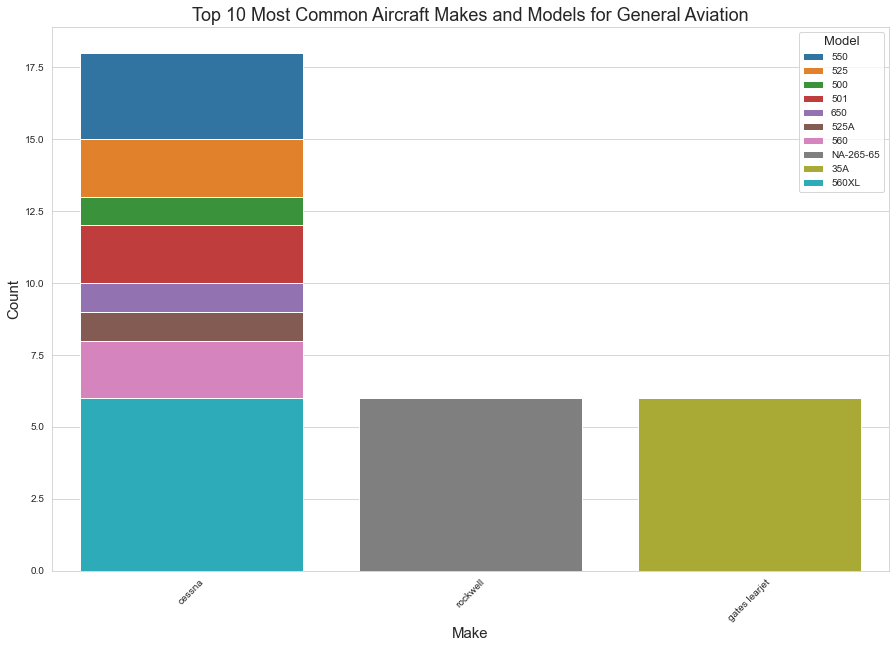

In [839]:
# finding the most common makes and models for each purpose of flight
# Combine the desired categories into a single category called 'General Aviation'
df['Combined.Purpose'] = df['Purpose.of.flight'].replace(
    {'Business': 'General Aviation', 'Personal': 'General Aviation', 'Executive/corporate': 'General Aviation'})

# Filter the dataset
filtered_data = df[df['Combined.Purpose'] == 'General Aviation']

# Group by combined purpose, make, and model, and count the occurrences
grouped_data = filtered_data.groupby(['Combined.Purpose', 'Make', 'Model']).size().reset_index(name='Count')

# Sort the data by count
sorted_data = grouped_data.sort_values(['Count'], ascending=False)

# Keep only the top N most common makes and models (e.g., top 10)
top_n = 10
top_makes_models = sorted_data.head(top_n).reset_index(drop=True)

# Set the figure size and style
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Create the bar chart
bar_plot = sns.barplot(x='Make', y='Count', hue='Model', data=top_makes_models, dodge=False)

# Customize the plot
plt.title("Top 10 Most Common Aircraft Makes and Models for General Aviation", fontsize=18)
plt.xlabel("Make", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Model', title_fontsize='13', loc='upper right')

# Show the plot
plt.show()



In [840]:
# Filter the dataset to only include rows with a value of 'Business', 'Personal' or 'Executive/corporate' in the 'Purpose.of.flight' column
df  = df[df['Purpose.of.flight'].isin(['Business', 'Personal', 'Executive/corporate'])]

df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Combined.Purpose
737,20020917X01902,Incident,CHI82IA112,1982-04-02,"DETROIT, MI",United States,NaN,NaN,DTW,DETROIT METRO,...,NaN,0.0,0.0,0.0,8.0,VMC,Taxi,Probable Cause,02-04-1983,General Aviation
906,20020917X02479,Incident,MKC82IA059,1982-04-20,"ST. LOUIS, MO",United States,NaN,NaN,STL,LAMBERT-ST. LOUIS INTL,...,NaN,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,20-04-1983,General Aviation
1489,20020917X03815,Accident,MKC82DA099,1982-06-08,"TOPEKA, KS",United States,NaN,NaN,TOP,PHILLIP BILLARD,...,NaN,0.0,1.0,0.0,1.0,VMC,Standing,Probable Cause,08-06-1983,General Aviation
3292,20020917X04492,Accident,DCA83AA005,1982-11-18,"MOUNTAIN VIEW, MO",United States,NaN,NaN,NaN,MOUTAIN VIEW AIRPORT,...,NaN,3.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,18-11-1983,General Aviation
3620,20001214X41966,Accident,DCA83AA010,1983-01-03,"HAILEY, ID",United States,NaN,NaN,SUN,FRIEDMAN MEMORIAL,...,NaN,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,NaN,General Aviation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85785,20200520X14844,Accident,CEN20LA185,2020-05-20,"Houston, TX",United States,293845N,0951637W,HOU,William P Hobby,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,26-09-2020,General Aviation
86143,20200723X40050,Accident,ERA20LA259,2020-07-22,"Montgomery, AL",United States,032185N,0862343W,MGM,Montgomery Rgnl (Dannelly Fiel,...,N425BJ LLC,0.0,0.0,0.0,2.0,VMC,NaN,NaN,26-09-2020,General Aviation
87367,20210524103131,Accident,ERA21LA227,2021-05-02,"Charleston, SC",United States,324141N,0080011W,JZI,CHARLESTON EXEC,...,STB AVIATION LLC,0.0,0.0,0.0,6.0,VMC,NaN,The airplane's impact with a deer during takeoff.,NaN,General Aviation
88946,20220406104897,Accident,WPR22LA143,2022-04-02,"Van Nuys, CA",United States,034137N,1182932W,VNY,Van Nuys,...,SANCTUS AVIATION LLC,0.0,0.0,0.0,8.0,VMC,NaN,The student pilots failure to maintain suffic...,20-07-2022,General Aviation


In [841]:
# Remove all rows with value of 'Unknown' in the 'Aircraft.damage' column
df = df[df['Aircraft.damage'] != 'Unknown']

# Remove all rows with no value in the 'Aircraft.damage' column
df = df[df['Aircraft.damage'].notna()]

df.head(100)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Combined.Purpose
737,20020917X01902,Incident,CHI82IA112,1982-04-02,"DETROIT, MI",United States,NaN,NaN,DTW,DETROIT METRO,...,NaN,0.0,0.0,0.0,8.0,VMC,Taxi,Probable Cause,02-04-1983,General Aviation
906,20020917X02479,Incident,MKC82IA059,1982-04-20,"ST. LOUIS, MO",United States,NaN,NaN,STL,LAMBERT-ST. LOUIS INTL,...,NaN,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,20-04-1983,General Aviation
3292,20020917X04492,Accident,DCA83AA005,1982-11-18,"MOUNTAIN VIEW, MO",United States,NaN,NaN,NaN,MOUTAIN VIEW AIRPORT,...,NaN,3.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,18-11-1983,General Aviation
3620,20001214X41966,Accident,DCA83AA010,1983-01-03,"HAILEY, ID",United States,NaN,NaN,SUN,FRIEDMAN MEMORIAL,...,NaN,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,NaN,General Aviation
3702,20001214X42024,Incident,LAX83IA073,1983-01-16,"LOS ANGELES, CA",United States,NaN,NaN,LAX,LOS ANGELES,...,NaN,0.0,0.0,0.0,412.0,VMC,Taxi,Probable Cause,NaN,General Aviation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53256,20020829X01483,Accident,NYC02LA172,2002-08-10,"SANDUSKY, OH",United States,41.433333,-80.652222,SKY,Griffing Sandusky Airport,...,NaN,NaN,NaN,NaN,2.0,VMC,Takeoff,Probable Cause,18-04-2003,General Aviation
53618,20021023X05375,Accident,NYC03FA002,2002-10-07,"DEXTER, ME",United States,45.008333,-69.240833,1B0,Dexter Regional Airport,...,NaN,NaN,2.0,2.0,NaN,VMC,Landing,Probable Cause,30-06-2004,General Aviation
53924,20021220X05625,Accident,SEA03LA018,2002-12-16,"SEATTLE, WA",United States,47.516667,-122.303333,BFI,Boeing Fld/King Co Intl,...,NaN,NaN,NaN,NaN,3.0,IMC,Landing,Probable Cause,23-07-2003,General Aviation
55156,20030724X01192,Accident,SEA03FA147,2003-07-22,"COUPEVILLE, WA",United States,48.208056,-122.576389,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,VMC,Climb,Probable Cause,27-10-2005,General Aviation


In [842]:
# Cleaning the 'Injury.Severity' column

# Check if the first 5 characters of the 'Injury.Severity' column are 'Fatal', and is greater than 5 characters.
# If it is, then set the value to 'Fatal'
df.loc[df['Injury.Severity'].str[:5] == 'Fatal', 'Injury.Severity'] = 'Fatal'

# Check if the value of the 'Injury.Severity' column matches 'Incident', 'Serious', 'Minor'. If it does, then set the value to 'Non-Fatal'
df.loc[df['Injury.Severity'].isin(['Incident', 'Serious', 'Minor']), 'Injury.Severity'] = 'Non-Fatal'

# Remove all rows with no value in the 'Injury.Severity' column
df = df[df['Injury.Severity'].notna()]

# Remove all rows with value of 'Unavailable' in the 'Injury.Severity' column
df = df[df['Injury.Severity'] != 'Unavailable']

In [843]:
df.head(100)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Combined.Purpose
737,20020917X01902,Incident,CHI82IA112,1982-04-02,"DETROIT, MI",United States,NaN,NaN,DTW,DETROIT METRO,...,NaN,0.0,0.0,0.0,8.0,VMC,Taxi,Probable Cause,02-04-1983,General Aviation
906,20020917X02479,Incident,MKC82IA059,1982-04-20,"ST. LOUIS, MO",United States,NaN,NaN,STL,LAMBERT-ST. LOUIS INTL,...,NaN,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,20-04-1983,General Aviation
3292,20020917X04492,Accident,DCA83AA005,1982-11-18,"MOUNTAIN VIEW, MO",United States,NaN,NaN,NaN,MOUTAIN VIEW AIRPORT,...,NaN,3.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,18-11-1983,General Aviation
3620,20001214X41966,Accident,DCA83AA010,1983-01-03,"HAILEY, ID",United States,NaN,NaN,SUN,FRIEDMAN MEMORIAL,...,NaN,2.0,0.0,0.0,0.0,VMC,Approach,Probable Cause,NaN,General Aviation
3702,20001214X42024,Incident,LAX83IA073,1983-01-16,"LOS ANGELES, CA",United States,NaN,NaN,LAX,LOS ANGELES,...,NaN,0.0,0.0,0.0,412.0,VMC,Taxi,Probable Cause,NaN,General Aviation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53256,20020829X01483,Accident,NYC02LA172,2002-08-10,"SANDUSKY, OH",United States,41.433333,-80.652222,SKY,Griffing Sandusky Airport,...,NaN,NaN,NaN,NaN,2.0,VMC,Takeoff,Probable Cause,18-04-2003,General Aviation
53618,20021023X05375,Accident,NYC03FA002,2002-10-07,"DEXTER, ME",United States,45.008333,-69.240833,1B0,Dexter Regional Airport,...,NaN,NaN,2.0,2.0,NaN,VMC,Landing,Probable Cause,30-06-2004,General Aviation
53924,20021220X05625,Accident,SEA03LA018,2002-12-16,"SEATTLE, WA",United States,47.516667,-122.303333,BFI,Boeing Fld/King Co Intl,...,NaN,NaN,NaN,NaN,3.0,IMC,Landing,Probable Cause,23-07-2003,General Aviation
55156,20030724X01192,Accident,SEA03FA147,2003-07-22,"COUPEVILLE, WA",United States,48.208056,-122.576389,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,VMC,Climb,Probable Cause,27-10-2005,General Aviation


In [844]:
# filter df to only include rows with a value of 'Business', 'Personal' or 'Executive/corporate' in the 'Purpose.of.flight' column
df = df[df['Purpose.of.flight'].isin(['Business', 'Personal', 'Executive/corporate'])]

In [845]:
# safety score calculator version 2
aircraft_damage_points = {
    'Destroyed': 1,
    'Substantial': 2,
    'Minor': 3
}

injury_severity_points = {
    'Fatal': 1,
    'Non-Fatal': 2
}

df['Aircraft.Damage.Points'] = df['Aircraft.damage'].map(aircraft_damage_points)
df['Injury.Severity.Points'] = df['Injury.Severity'].map(injury_severity_points)

make_model_group = df.groupby(['Make', 'Model', 'Purpose.of.flight']).agg({
    'Aircraft.Damage.Points': 'mean',
    'Injury.Severity.Points': 'mean'
}).reset_index()

make_model_group['Safety.Score'] = (
        make_model_group['Injury.Severity.Points'] * 0.75 +
        make_model_group['Aircraft.Damage.Points'] * 0.25
)

# Normalize the safety scores to a range of 0-100
max_score = make_model_group['Safety.Score'].max()
min_score = make_model_group['Safety.Score'].min()
make_model_group['Safety.Score'] = ((make_model_group['Safety.Score'] - min_score) / (max_score - min_score)) * 100

# Sort the DataFrame by the safety score in descending order (higher score = safer)
make_model_safety_scores = make_model_group.sort_values(by='Safety.Score', ascending=False)


In [846]:
make_model_safety_scores

,Make,Model,Purpose.of.flight,Aircraft.Damage.Points,Injury.Severity.Points,Safety.Score
118,rockwell,SABRELINER 65,Executive/corporate,3.0,2.0,100.0
109,raytheon,400A,Executive/corporate,3.0,2.0,100.0
61,dassault aviation,DA-900B,Executive/corporate,3.0,2.0,100.0
62,dassault aviation,DA20F,Business,3.0,2.0,100.0
65,embraer,500,Personal,3.0,2.0,100.0
...,...,...,...,...,...,...
63,dassault aviation,FALCON 50,Executive/corporate,1.0,1.0,0.0
69,gates learjet,24F,Business,1.0,1.0,0.0
94,israel aircraft industries,1124,Personal,1.0,1.0,0.0
100,israel aircraft industries,Westwind 1124,Executive/corporate,1.0,1.0,0.0


In [847]:
# combine the 'Make' and 'Model' columns of make_model_safety_scores into a single column
make_model_safety_scores['Make_Model'] = make_model_safety_scores['Make'] + ' ' + make_model_safety_scores['Model']

In [848]:
make_model_safety_scores

,Make,Model,Purpose.of.flight,Aircraft.Damage.Points,Injury.Severity.Points,Safety.Score,Make_Model
118,rockwell,SABRELINER 65,Executive/corporate,3.0,2.0,100.0,rockwell SABRELINER 65
109,raytheon,400A,Executive/corporate,3.0,2.0,100.0,raytheon 400A
61,dassault aviation,DA-900B,Executive/corporate,3.0,2.0,100.0,dassault aviation DA-900B
62,dassault aviation,DA20F,Business,3.0,2.0,100.0,dassault aviation DA20F
65,embraer,500,Personal,3.0,2.0,100.0,embraer 500
...,...,...,...,...,...,...,...
63,dassault aviation,FALCON 50,Executive/corporate,1.0,1.0,0.0,dassault aviation FALCON 50
69,gates learjet,24F,Business,1.0,1.0,0.0,gates learjet 24F
94,israel aircraft industries,1124,Personal,1.0,1.0,0.0,israel aircraft industries 1124
100,israel aircraft industries,Westwind 1124,Executive/corporate,1.0,1.0,0.0,israel aircraft industries Westwind 1124


In [849]:
# output make_model_safety_scores to a csv file that will later be imported into Tableau
make_model_safety_scores.to_csv('data/make_model_safety_scores.csv', index=False)